In [1]:
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

root = ET.parse('datasets/OhioT1DM/559-ws-testing.xml').getroot()

In [38]:
def parse_data(data_type):
    """
    Parse XML data into a NumPy array of arrays based on the specified data type.

    Returns:
        np.ndarray: A NumPy array of arrays containing the parsed data.
    """

    # Initialize lists to store data
    data = []

    # Handle different data types
    if data_type in ['glucose_level', 'finger_stick', 'basal', 'basis_heart_rate', 'basis_gsr', 'basis_skin_temperature', 'basis_air_temperature', 'basis_steps']:
        # For data types with simple timestamp-value pairs
        for event in root.findall(f'.//{data_type}/event'):
            ts_str = event.get('ts')
            ts = datetime.strptime(ts_str, '%d-%m-%Y %H:%M:%S')
            value = float(event.get('value')) if data_type in ['basal', 'basis_gsr', 'basis_skin_temperature', 'basis_air_temperature'] else int(event.get('value'))
            data.append([np.datetime64(ts), value])

    elif data_type in ['temp_basal', 'sleep', 'work', 'illness', 'basis_sleep']:
        # For data types with start and end timestamps
        for event in root.findall(f'.//{data_type}/event'):
            ts_begin_str = event.get('ts_begin') or event.get('tbegin')
            ts_end_str = event.get('ts_end') or event.get('tend')
            ts_begin = datetime.strptime(ts_begin_str, '%d-%m-%Y %H:%M:%S') if ts_begin_str else None
            ts_end = datetime.strptime(ts_end_str, '%d-%m-%Y %H:%M:%S') if ts_end_str else None
            if data_type == 'sleep':
                quality = int(event.get('quality'))
                data.append([np.datetime64(ts_begin), np.datetime64(ts_end), quality])
            elif data_type == 'work':
                intensity = int(event.get('intensity'))
                data.append([np.datetime64(ts_begin), np.datetime64(ts_end), intensity])
            elif data_type == 'illness':
                illness_type = event.get('type', '')
                description = event.get('description', '')
                data.append([np.datetime64(ts_begin), illness_type, description])
            elif data_type == 'basis_sleep':
                quality = int(event.get('quality'))
                sleep_type = event.get('type', '')
                data.append([np.datetime64(ts_begin), np.datetime64(ts_end), quality, sleep_type])

    elif data_type == 'bolus':
        # For bolus data with additional attributes
        for event in root.findall(f'.//{data_type}/event'):
            ts_begin_str = event.get('ts_begin')
            ts_end_str = event.get('ts_end')
            ts_begin = datetime.strptime(ts_begin_str, '%d-%m-%Y %H:%M:%S')
            ts_end = datetime.strptime(ts_end_str, '%d-%m-%Y %H:%M:%S')
            dose = float(event.get('dose'))
            carb_input = int(event.get('bwz_carb_input'))
            data.append([np.datetime64(ts_begin), np.datetime64(ts_end), dose, carb_input])

    elif data_type == 'meal':
        # For meal data with meal type and carbs
        for event in root.findall(f'.//{data_type}/event'):
            ts_str = event.get('ts')
            ts = datetime.strptime(ts_str, '%d-%m-%Y %H:%M:%S')
            meal_type = event.get('type')
            carbs = int(event.get('carbs'))
            data.append([np.datetime64(ts), meal_type, carbs])

    elif data_type == 'exercise':
        # For exercise data with intensity, type, duration, and competitive flag
        for event in root.findall(f'.//{data_type}/event'):
            ts_str = event.get('ts')
            ts = datetime.strptime(ts_str, '%d-%m-%Y %H:%M:%S')
            intensity = int(event.get('intensity'))
            exercise_type = event.get('type', '')
            duration = int(event.get('duration'))
            competitive = event.get('competitive', '')
            data.append([np.datetime64(ts), intensity, exercise_type, duration, competitive])

    # Convert to NumPy array of arrays
    return np.array(data, dtype=object)


def visualise_data (data,title,num):
    plt.figure(figsize=(20, 5))
    plt.plot(data[:,0], data[:,num])
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(title)
    plt.grid(True)
    plt.show()




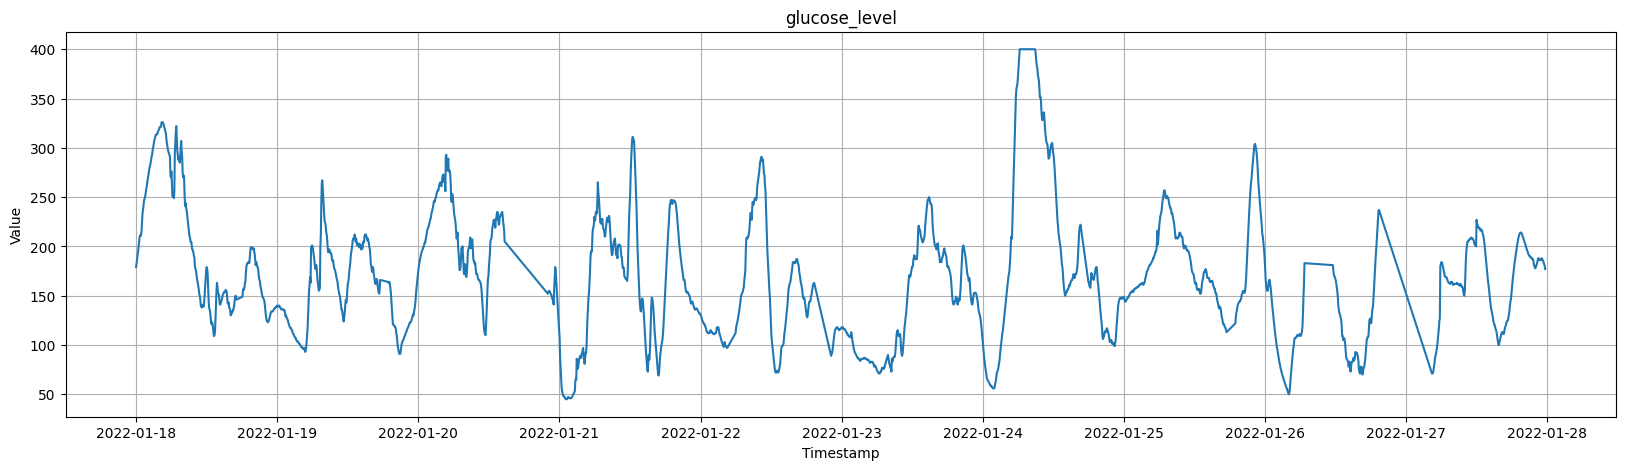

In [20]:

glucose_level = parse_data('glucose_level')
visualise_data(glucose_level,'glucose_level',1)

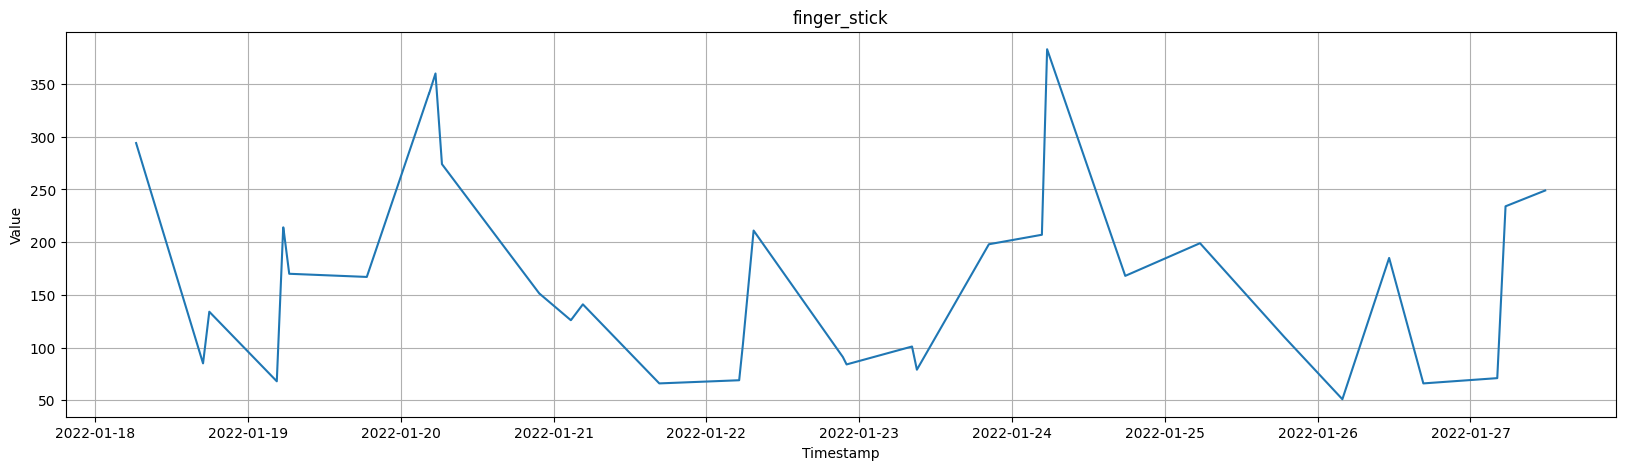

In [21]:
finger_stick = parse_data('finger_stick')
visualise_data(finger_stick,'finger_stick',1)

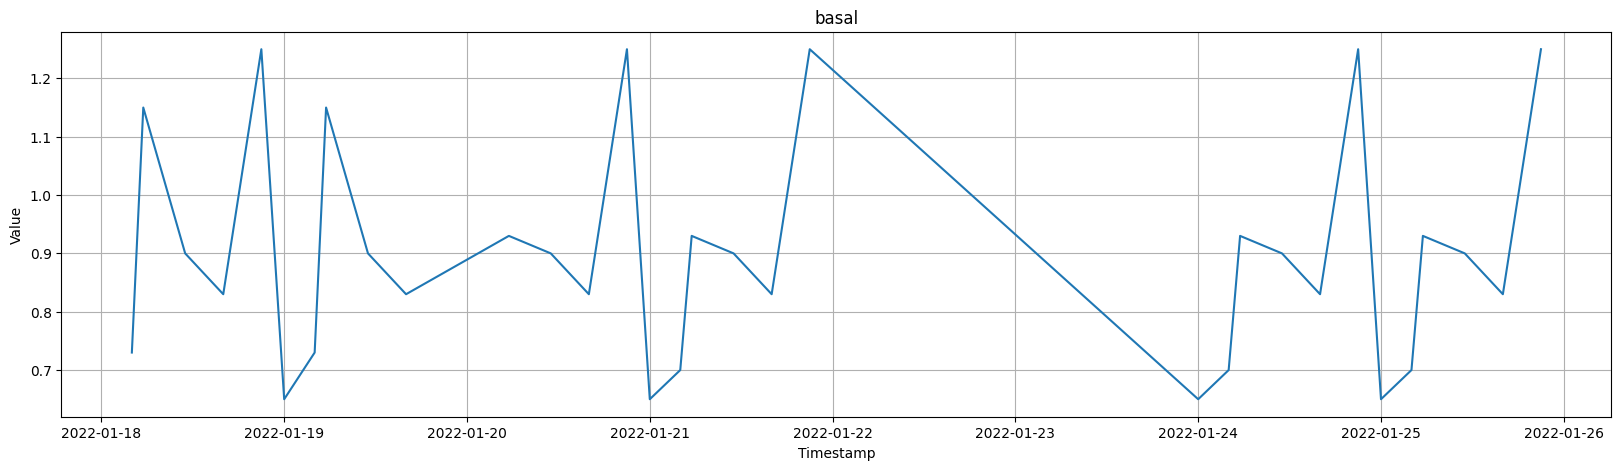

In [22]:
basal = parse_data('basal')
visualise_data(basal, 'basal',1)


In [23]:

temp_basal = parse_data('temp_basal')


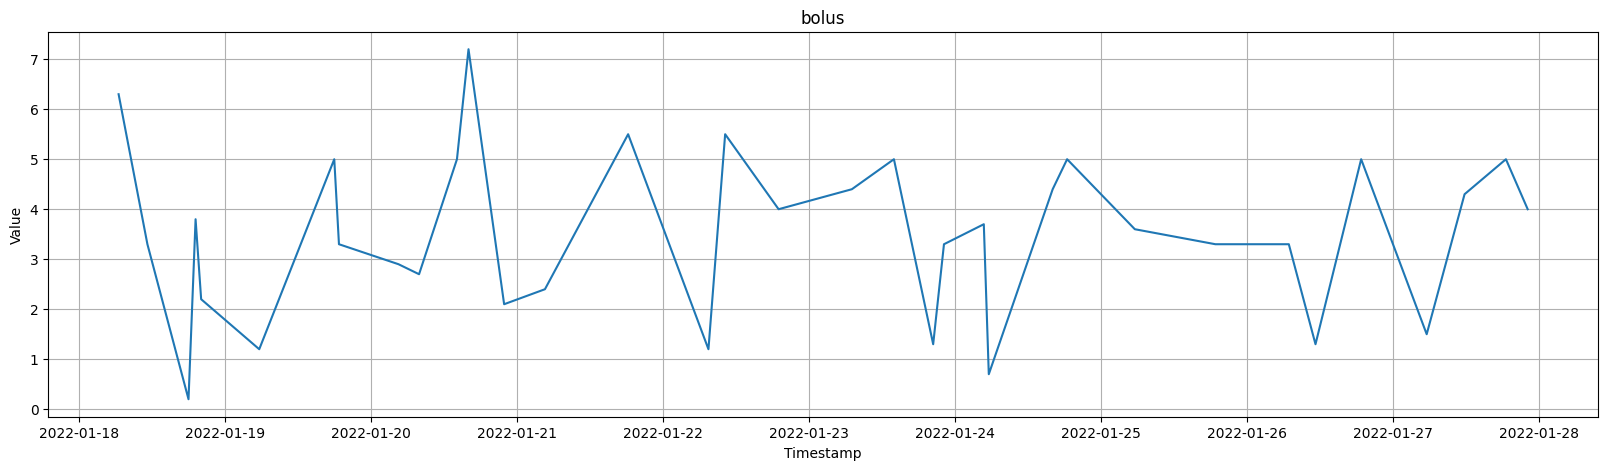

In [24]:

bolus = parse_data('bolus')
visualise_data(bolus, 'bolus',2)


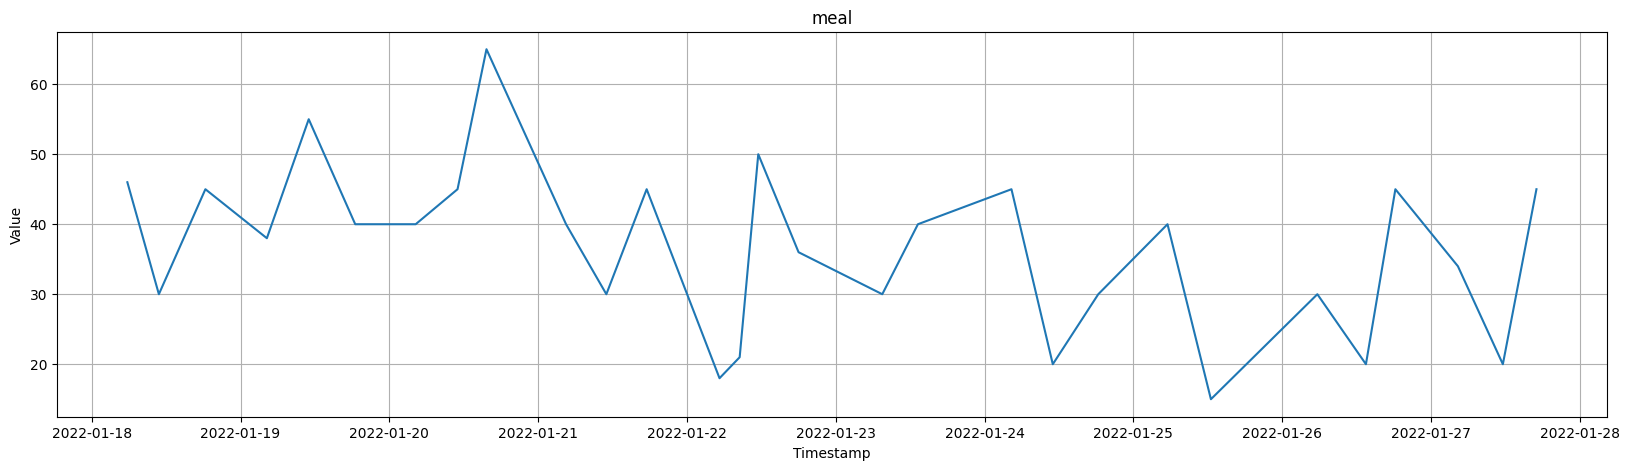

In [25]:

meal = parse_data('meal')
visualise_data(meal, 'meal',2)


In [ ]:

sleep = parse_data('sleep')

work = parse_data('work')

illness = parse_data('illness')


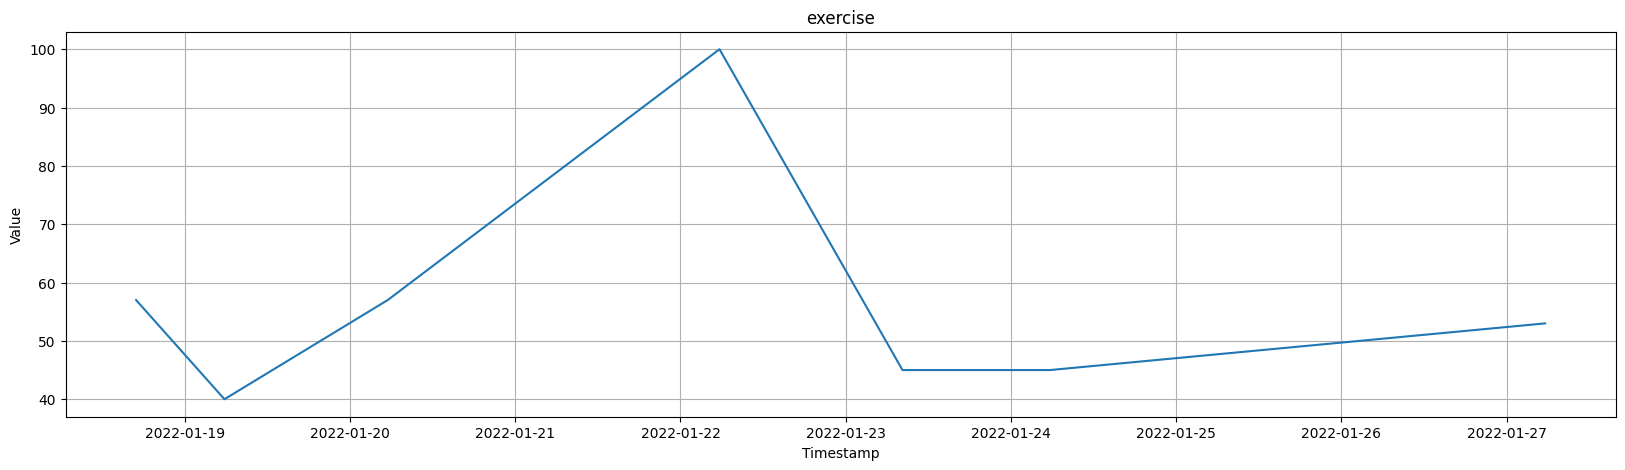

In [30]:

exercise = parse_data('exercise')
visualise_data(exercise, 'exercise',3)


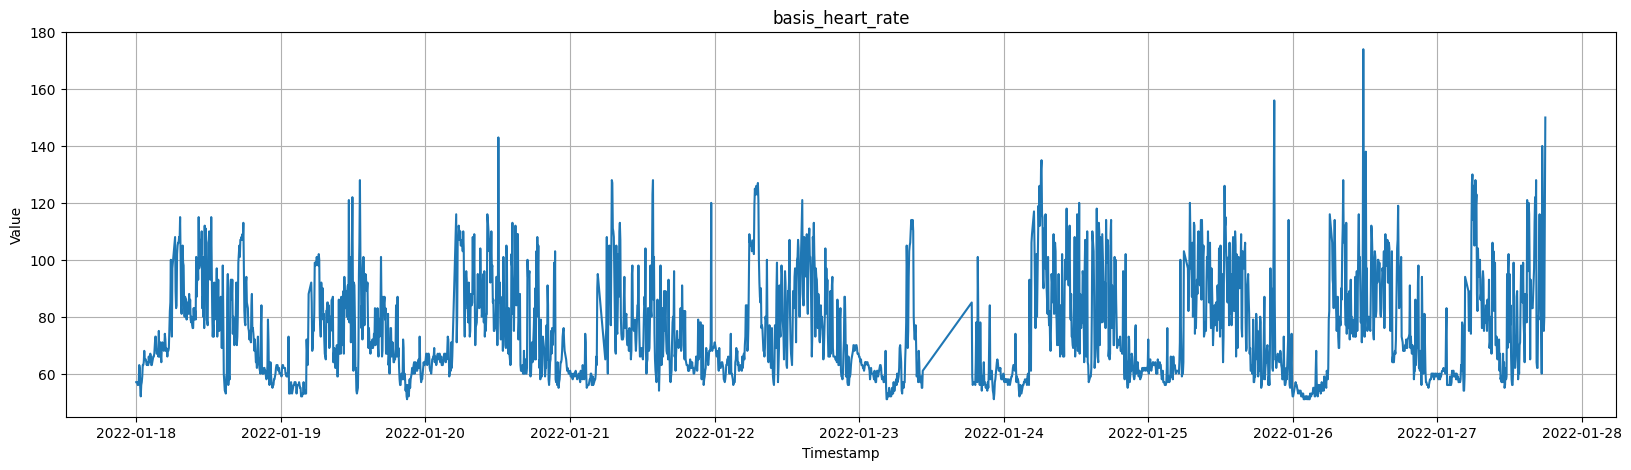

In [31]:

basis_heart_rate = parse_data('basis_heart_rate')
visualise_data(basis_heart_rate, 'basis_heart_rate',1)


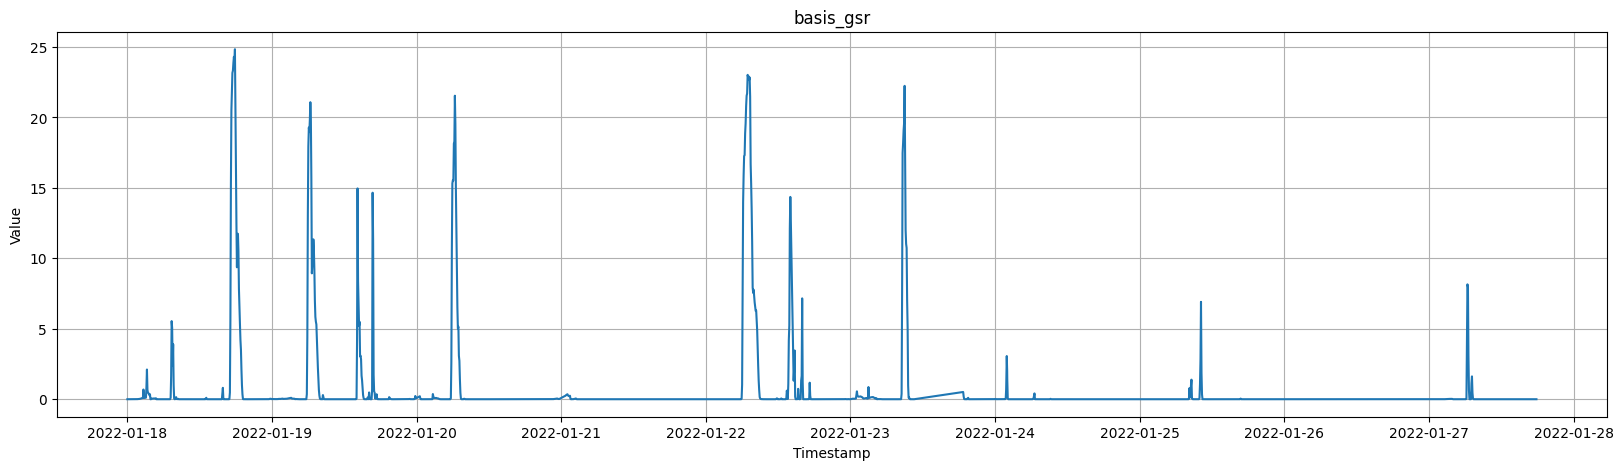

In [32]:

basis_gsr = parse_data('basis_gsr')
visualise_data(basis_gsr, 'basis_gsr',1)


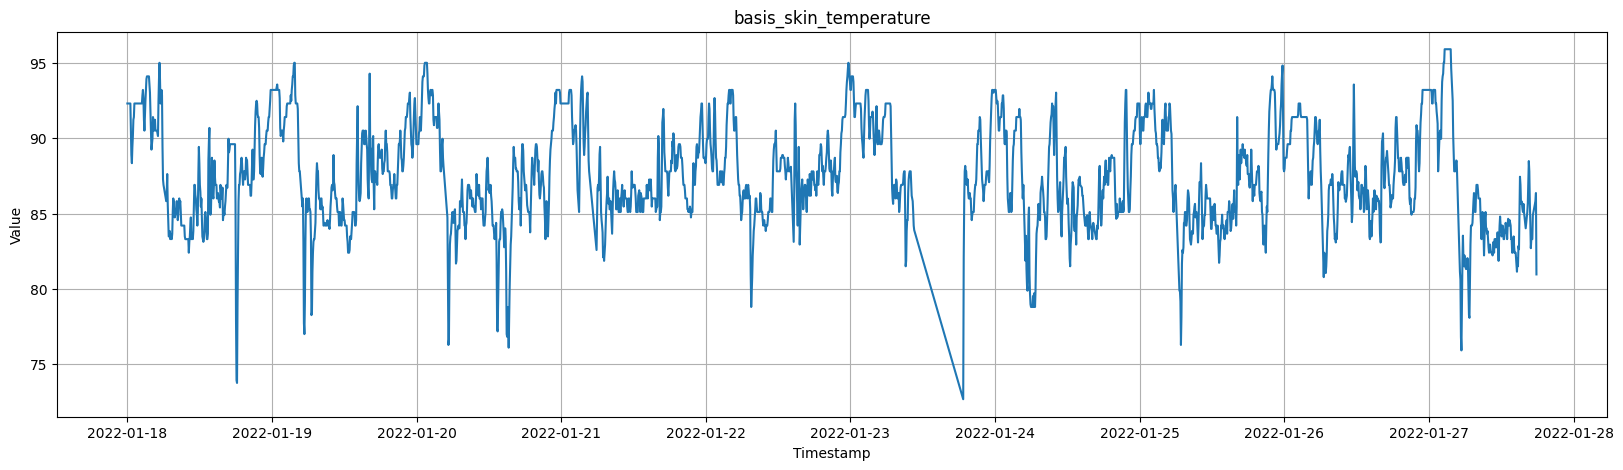

In [44]:

basis_skin_temp = parse_data('basis_skin_temperature')
visualise_data(basis_skin_temp, 'basis_skin_temperature',1)


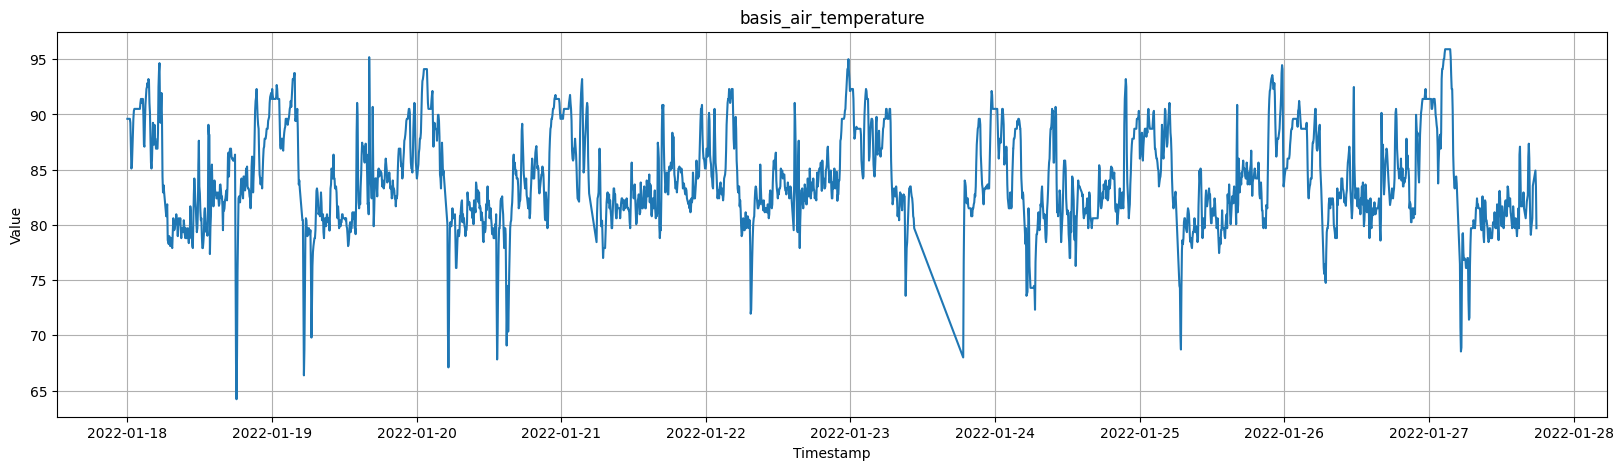

In [43]:

basis_air_temperature = parse_data('basis_air_temperature')
visualise_data(basis_air_temperature, 'basis_air_temperature',1)


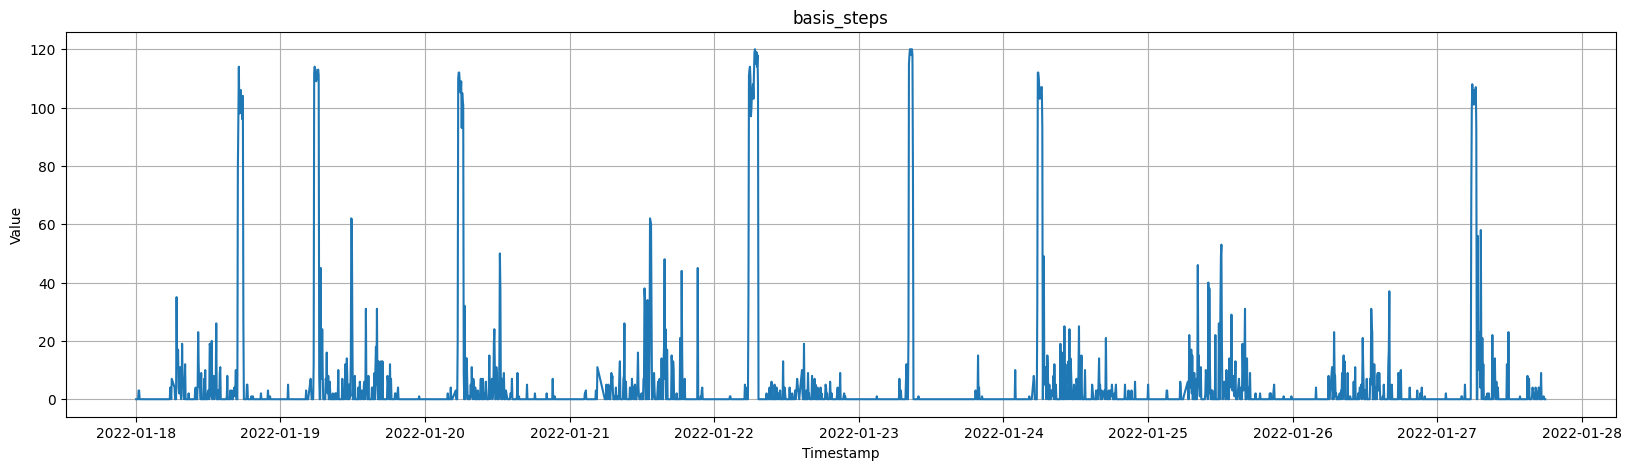

In [42]:

basis_steps = parse_data('basis_steps')
visualise_data(basis_steps, 'basis_steps',1)


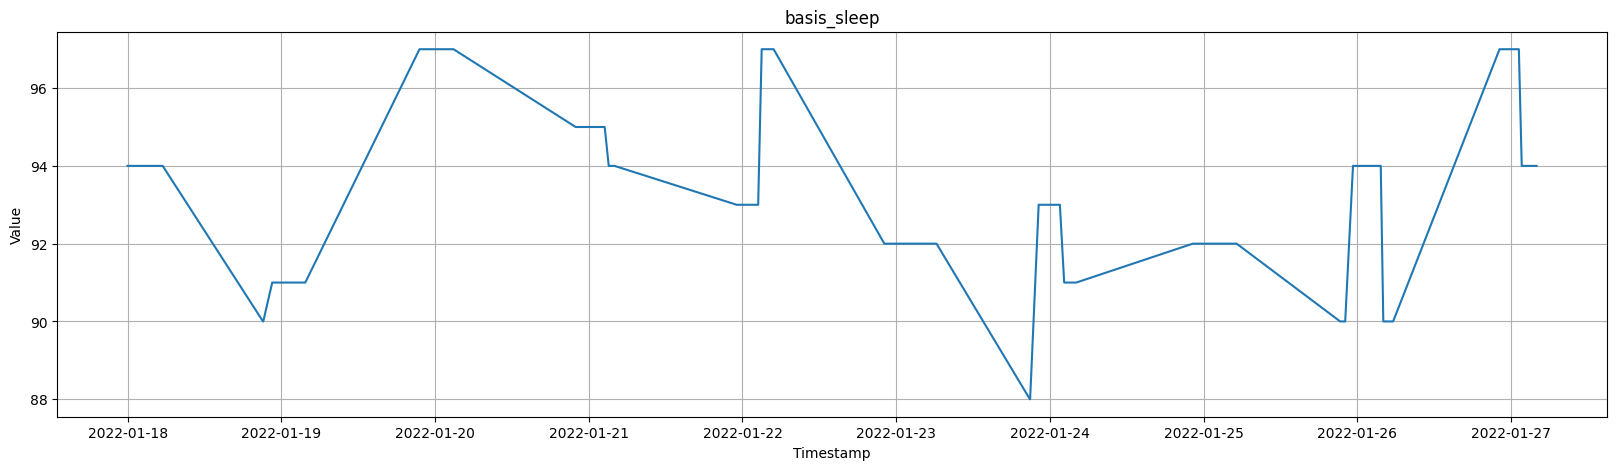

In [47]:

basis_sleep = parse_data('basis_sleep')
visualise_data(basis_sleep, 'basis_sleep',2)

In [ ]:
data_types = ['glucose_level', 'finger_stick', 'basal', 'temp_basal', 'bolus', 'meal',
              'sleep', 'work', 'illness', 'exercise', 'basis_heart_rate', 'basis_gsr',
              'basis_skin_temp', 'basis_air_temp', 'basis_steps', 'basis_sleep']


# XML content example
'''<?xml version="1.0" encoding="UTF-8"?>
<patient id="559" weight="99" insulin_type="Novalog">
  <glucose_level>
    <event ts="18-01-2022 00:01:00" value="179"/>
    <event ts="18-01-2022 00:06:00" value="183"/>
  </glucose_level>
  <finger_stick>
    <event ts="18-01-2022 06:26:05" value="294"/>
    <event ts="18-01-2022 16:56:49" value="85"/>
  </finger_stick>
  <basal>
    <event ts="18-01-2022 04:00:00" value="0.73"/>
    <event ts="18-01-2022 05:30:00" value="1.15"/>
  </basal>
  <temp_basal>
    <event ts_begin="19-01-2022 20:49:00" ts_end="20-01-2022 04:11:00" value="0.0"/>
  </temp_basal>
  <bolus>
    <event ts_begin="18-01-2022 06:26:05" ts_end="18-01-2022 06:26:05" type="normal" dose="6.3" bwz_carb_input="40"/>
  </bolus>
  <meal>
    <event ts="18-01-2022 05:45:00" type="Breakfast" carbs="46"/>
  </meal>
  <sleep>
    <event ts_begin="18-01-2022 05:30:00" ts_end="17-01-2022 21:30:00" quality="3"/>
  </sleep>
  <work>
    <event ts_begin="18-01-2022 13:30:00" ts_end="18-01-2022 13:30:00" intensity="5"/>
  </work>
  <illness>
    <event ts_begin="21-01-2022 04:45:00" ts_end="" type="" description=" "/>
  </illness>
  <exercise>
    <event ts="18-01-2022 16:55:00" intensity="5" type="running" duration="57" competitive="false"/>
  </exercise>
  <basis_heart_rate>
    <event ts="27-01-2022 17:45:00" value="80"/>
  </basis_heart_rate>
  <basis_gsr>
    <event ts="18-01-2022 00:01:00" value="1.83E-4"/>
  </basis_gsr>
  <basis_skin_temp>
    <event ts="18-01-2022 00:05:00" value="89.6"/>
  </basis_skin_temp>
  <basis_air_temp>
    <event ts="27-01-2022 17:51:00" value="79.7"/>
  </basis_air_temperatureeratureeratureerature>
  <basis_steps>
    <event ts="27-01-2022 17:23:00" value="0"/>
  </basis_steps>
  <basis_sleep>
    <event tbegin="17-01-2022 23:58:00" tend="18-01-2022 00:12:00" quality="94" type="deep"/>
  </basis_sleep>
</patient>'''
